In [2]:
# Survival Models 
# Date: 2025-06-24

# This notebook explores survival models used in actuarial science.
# We'll begin with basic lifetime distributions and simulate survival times.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon, weibull_min

# Set default plot style
plt.style.use("ggplot")

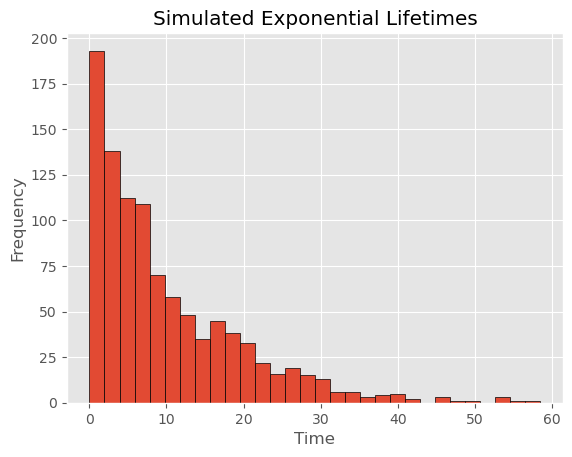

In [3]:
# Simulate lifetimes using an exponential distribution
# The exponential distribution models the time until an event (like death or failure) with constant hazard rate

# λ (lambda) is the rate parameter; higher lambda = shorter lifetimes
lambda_val = 0.1  # example rate
n = 1000  # number of simulated lifetimes

# Generate lifetimes
lifetimes = np.random.exponential(scale=1/lambda_val, size=n)

# Plot histogram of simulated lifetimes
plt.hist(lifetimes, bins=30, edgecolor='black')
plt.title('Simulated Exponential Lifetimes')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [4]:
import pandas as pd

# Load and view regions.csv using full file path and UTF-8 encoding
file_path = "/Users/dusanzdravkovic/Desktop/Actuary-Project/data/regions.csv"
regions_df = pd.read_csv(file_path, sep=";", encoding="ISO-8859-1", engine="python")

# Show first few rows
regions_df.head()

,Name,Region,Volume
0,Ile-de-France,R11,11938714
1,Champagne-Ardenne,R21,1373935
2,Picardie,R22,1962150
3,Haute-Normandie,R23,1879146
4,Centre,R24,2619613


In [5]:
# Clean column names
regions_df.columns = regions_df.columns.str.strip().str.replace('#', 'Volume').str.replace(' ', '_')
regions_df.head()

,Name,Region,Volume
0,Ile-de-France,R11,11938714
1,Champagne-Ardenne,R21,1373935
2,Picardie,R22,1962150
3,Haute-Normandie,R23,1879146
4,Centre,R24,2619613


In [6]:
regions_df.info()
regions_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Region  22 non-null     object
 2   Volume  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


,Volume
count,2.200000e+01
mean,2.918502e+06
std,2.460586e+06
min,3.148670e+05
25%,1.562013e+06
50%,2.184337e+06
75%,3.316244e+06
max,1.193871e+07


In [7]:
regions_df.sort_values(by="Volume", ascending=False).head(10)

,Name,Region,Volume
0,Ile-de-France,R11,11938714
17,Rhône-Alpes,R82,6384816
20,Provence Alpes Côte-d'Azur (PACA),R93,4984058
7,Nord-Pas-de-Calais,R31,4107148
11,Pays de la Loire,R52,3676582
14,Aquitaine,R72,3321058
12,Brittany - Bretagne,R53,3301802
15,Midi-Pyrénées,R73,2964308
19,Languedoc-Roussillon,R91,2693275
4,Centre,R24,2619613


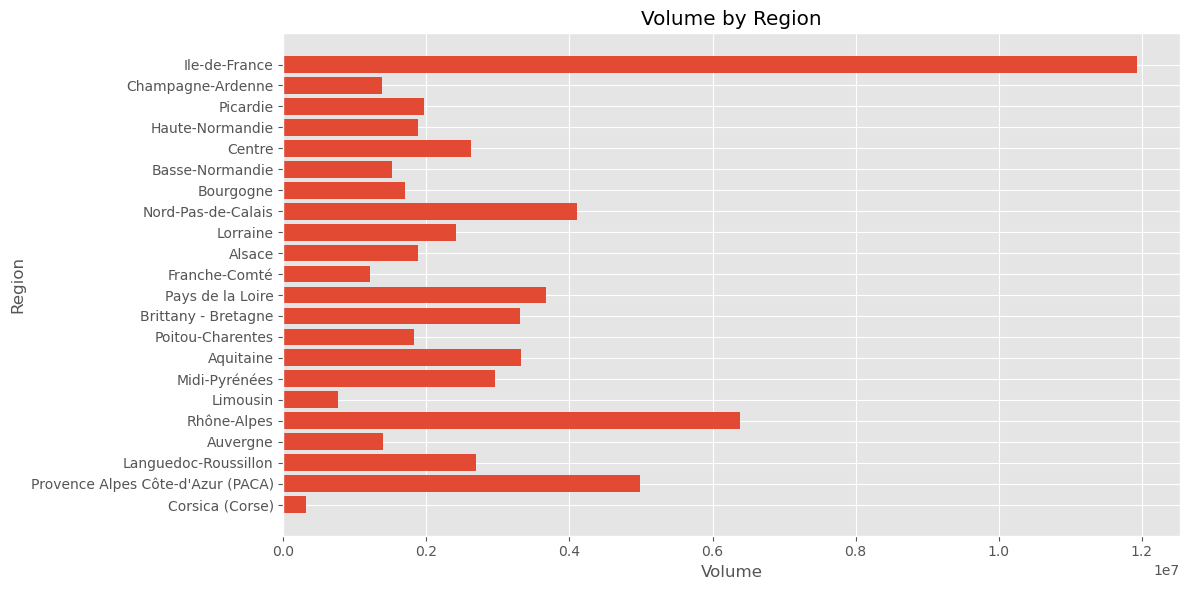

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(regions_df['Name'], regions_df['Volume'])
plt.xlabel('Volume')
plt.ylabel('Region')
plt.title('Volume by Region')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [9]:
# Load and view departements.csv
departments_path = "/Users/dusanzdravkovic/Desktop/Actuary-Project/data/departements.csv"
departments_df = pd.read_csv(departments_path, sep=";", encoding="ISO-8859-1", engine="python")

# Clean column names
departments_df.columns = departments_df.columns.str.strip().str.replace('#', 'Volume').str.replace(' ', '_')

# Preview
departments_df.head()

,Ind,Rname,Name
0,1,Nord,Nord-Pas-de-Calais
1,2,Pas-de-Calais,Nord-Pas-de-Calais
2,3,Somme,Picardie
3,4,Nord:1,Nord-Pas-de-Calais
4,5,Ardennes,Champagne-Ardenne


In [10]:
# Count departments per region
dept_counts = departments_df['Name'].value_counts().reset_index()
dept_counts.columns = ['Region_Name', 'Department_Count']
dept_counts.head()

,Region_Name,Department_Count
0,Brittany - Bretagne,11
1,Midi-Pyrénées,10
2,Provence Alpes Côte-d'Azur (PACA),10
3,Ile-de-France,8
4,Rhône-Alpes,8
